#Divide and conquer

## Binary Search

In [ ]:
n = int(input())
a = [int(i) for i in input().split()]
k = int(input())
b = [int(j) for j in input().split()]

for i in b:
  inicio = 0
  final = n - 1
  encontrado = False
  while inicio <= final:
    indice = int((inicio + final)/2)
    if i > a[indice]:
      inicio = indice + 1
    elif i < a[indice]:
      final = indice - 1
    elif i == a[indice]:
      encontrado = True
      if i == b[-1]:
        print(indice)
      else:
        print(indice, end = " ")
      break
  if not encontrado:
    if i == b[-1]:
      print(-1)
    else:
      print(-1, end = " ")

5
1 5 8 12 13
5
8 1 23 1 11
2 0 -1 0 -1


## Binary Search Duplicates

In [ ]:
n = int(input())
a = [int(i) for i in input().split()]
k = int(input())
b = [int(j) for j in input().split()]

for i in b:
  inicio = 0
  final = n - 1
  encontrado = False
  while inicio <= final:
    indice = int((inicio + final)/2)
    if i > a[indice]:
      inicio = indice + 1
    elif i < a[indice]:
      final = indice - 1
    elif i == a[indice]:
      encontrado = True
      ans = indice
      final = indice - 1
  if not encontrado:
    if i == b[-1]:
      print(-1)
    else:
      print(-1, end = " ")
  else:
    if i == b[-1]:
        print(ans)
    else:
        print(ans, end = " ")

7
2 4 4 4 7 7 9
4
9 4 5 2
6 1 -1 0


##Majority Element

In [ ]:
def majorityElement(arr,len):
    if len == 0:
        return None
    if len == 1:
        return arr[0]
    mid = int(len/2)
    izq = majorityElement(arr[0:mid],mid)
    der = majorityElement(arr[mid:],len-mid)
    if izq == der:
        return izq
    if arr.count(izq) > mid:
        return izq
    if arr.count(der) > mid:
        return der
    return None

n = int(input())
a = [int(i) for i in input().split()]
if majorityElement(a,n) == None:
  print(0)
else:
  print(1)

5
2 3 9 2 2
1


## Improving Quick Sort

In [ ]:
import random

def partition3(a, l, r):

    pivot = a[l]
    i = l
    lt = l
    gt = r
    while i <= gt:
        if a[i] < pivot:
            a[i], a[lt] = a[lt], a[i]
            lt += 1
            i += 1
        elif a[i] > pivot:
            a[i], a[gt] = a[gt], a[i]
            gt -= 1
        else:
            i += 1

    return lt, gt

def randomized_quick_sort(a, l, r):
    if l >= r:
        return
    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    #use partition3
    m1, m2 = partition3(a, l, r)
    randomized_quick_sort(a, l, m1 - 1);
    randomized_quick_sort(a, m2 + 1, r);

n = int(input())
a = [int(i) for i in input().split()]
randomized_quick_sort(a, 0, n - 1)
for x in a:
    if x == a[-1]:
      print(x)
    else:
      print(x, end=' ')

5
2 3 9 2 2
2 2 2 3 9


## Number of inversions

In [ ]:
def merge(left, right):
    i, j, inv = 0, 0, 0
    final = []
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inv += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inv

def mergesort(arr):
    global ans
    if len(arr) <= 1:
        return arr
    mid = int(len(arr)/2)

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    ans += temp

    return sorted_arr

ans = 0
n = int(input())
a = [int(i) for i in input().split()]
mergesort(a)
print(ans)

5
2 3 9 2 9
2


## Organizing a lottery

In [ ]:
puntos = []
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(j) for j in input().split()]
    puntos.append((a,'left'))
    puntos.append((b,'right'))

x = input().split()
for i in x:
    puntos.append((int(i),'mark'))

puntos.sort()

segmentos = 0
intersec = dict()
for i in puntos:
    if i[1] == 'left':
      segmentos += 1
    elif i[1] == 'right':
      segmentos -= 1
    else:
        intersec[i[0]] = segmentos

ans = ''
for punto in x:
    ans += str(intersec[int(punto)]) + ' '
print(ans[:-1])

3 2
0 5
-3 2
7 10
1 6
2 0


## Closest Points

In [ ]:
import math
def calcula_dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def fuerza_bruta(ax):
    ans = calcula_dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    len_ax = len(ax)
    if len_ax == 2:
        return p1, p2, ans
    for i in range(len_ax - 1):
        for j in range(i + 1, len_ax):
            if i != 0 and j != 1:
                d = calcula_dist(ax[i], ax[j])
                if d < ans:
                    ans = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, ans

def frontera(px, py, delta, mejor_par):
    len_x = len(px)
    max_x = px[int(len_x / 2)][0]

    s_y = [x for x in py if (max_x - delta <= x[0] <= max_x + delta)]

    mejor = delta
    len_y = len(s_y)
    for i in range(len_y - 1):
        for j in range(i+1, min(i + 5, len_y)):
            p, q = s_y[i], s_y[j]
            distance = calcula_dist(p, q)
            if distance < mejor:
                mejor_par = p, q
                mejor = distance
    return mejor_par[0], mejor_par[1], mejor

def mas_cercano(ax, ay):
    len_ax = len(ax)
    if len_ax <= 3:
        return fuerza_bruta(ax)
    mid = len_ax // 2
    izq_x = ax[:mid]
    der_x = ax[mid:]

    punto_medio = ax[mid][0]
    izq_y = []
    der_y = []
    for x in ay:
        if x[0] < punto_medio:
           izq_y.append(x)
        else:
           der_y.append(x)
    (p1, q1, ans1) = mas_cercano(izq_x, izq_y)
    (p2, q2, ans2) = mas_cercano(der_x, der_y)

    if ans1 <= ans2:
        d = ans1
        mejor_par = (p1, q1)
    else:
        d = ans2
        mejor_par = (p2, q2)

    (p3, q3, ans3) = frontera(ax, ay, d, mejor_par)
    if d <= ans3:
        return mejor_par[0], mejor_par[1], d
    else:
        return p3, q3, ans3


def encuentra_dist(arr):
    a_x = sorted(arr, key = lambda x: x[0])
    a_y = sorted(arr, key = lambda x: (x[1], x[0]))
    p1, p2, distancia_minima = mas_cercano(a_x, a_y)
    return distancia_minima

puntos = []
n = int(input())
for i in range(n):
    puntos.append([int(i) for i in input().split()])

print("{:.4f}".format(encuentra_dist(puntos)))

11
4 4
-2 -2
-3 -4
-1 3
2 3
-4 0
1 1
-1 -1
3 -1
-4 2
-2 4
1.4142


# Evidencias Coursera UN:

- Nicolás Romero Niño:
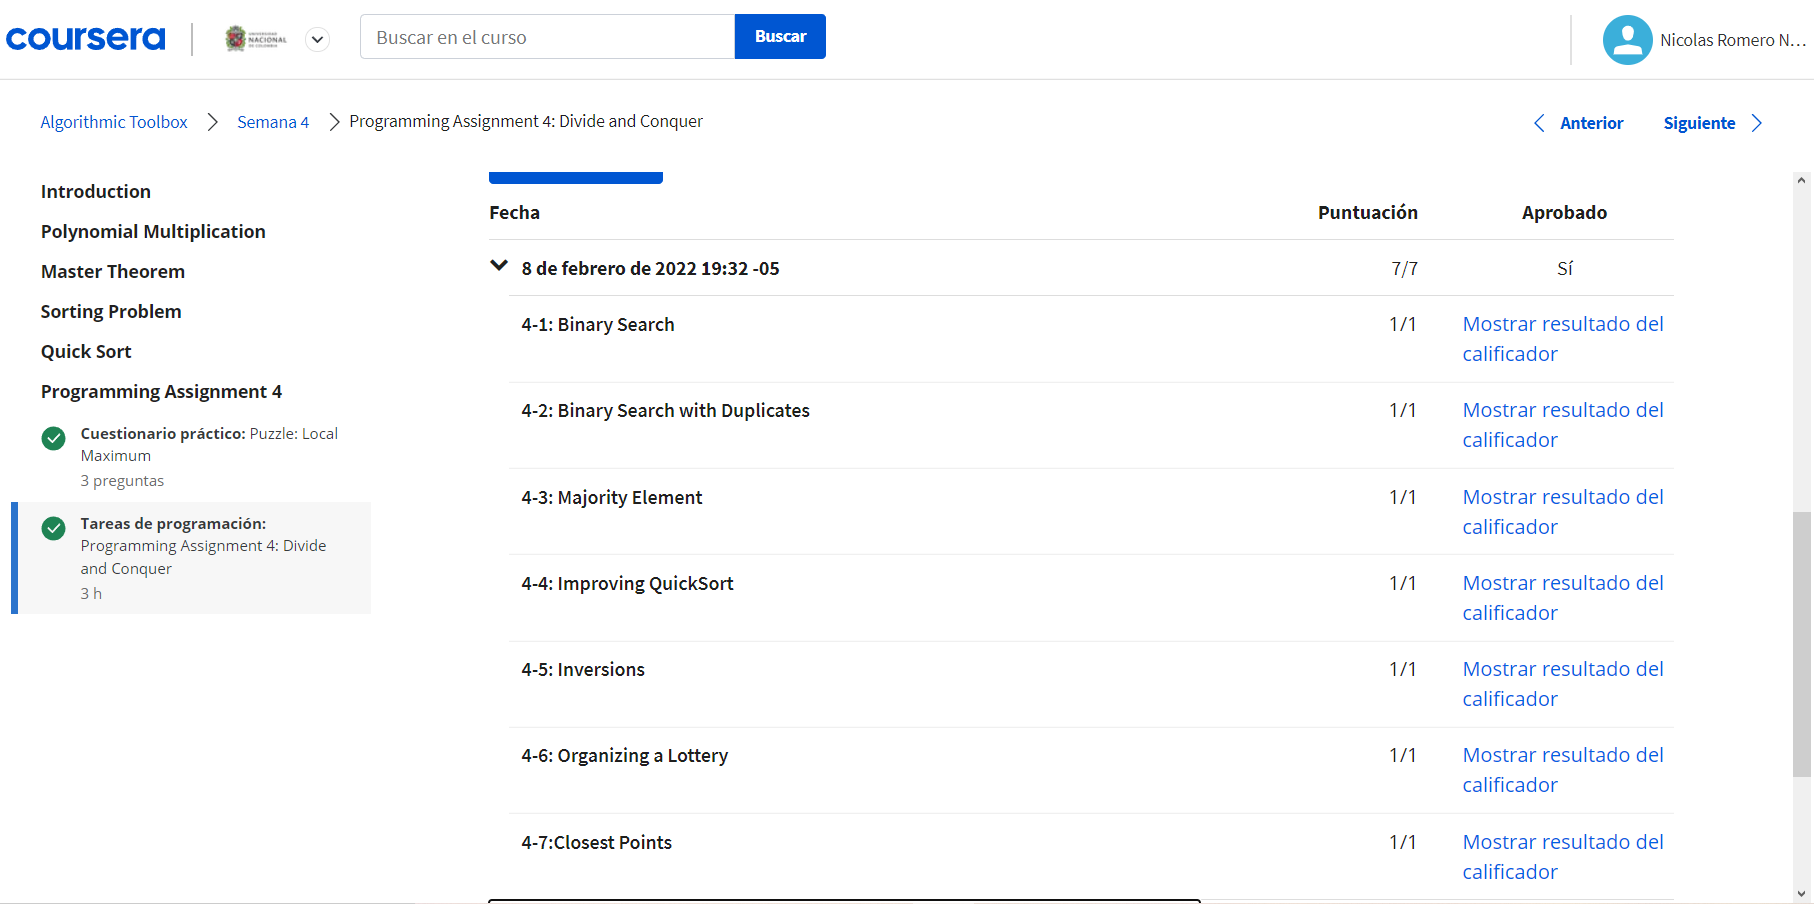

- Juan Pablo Bustamante Moreno:
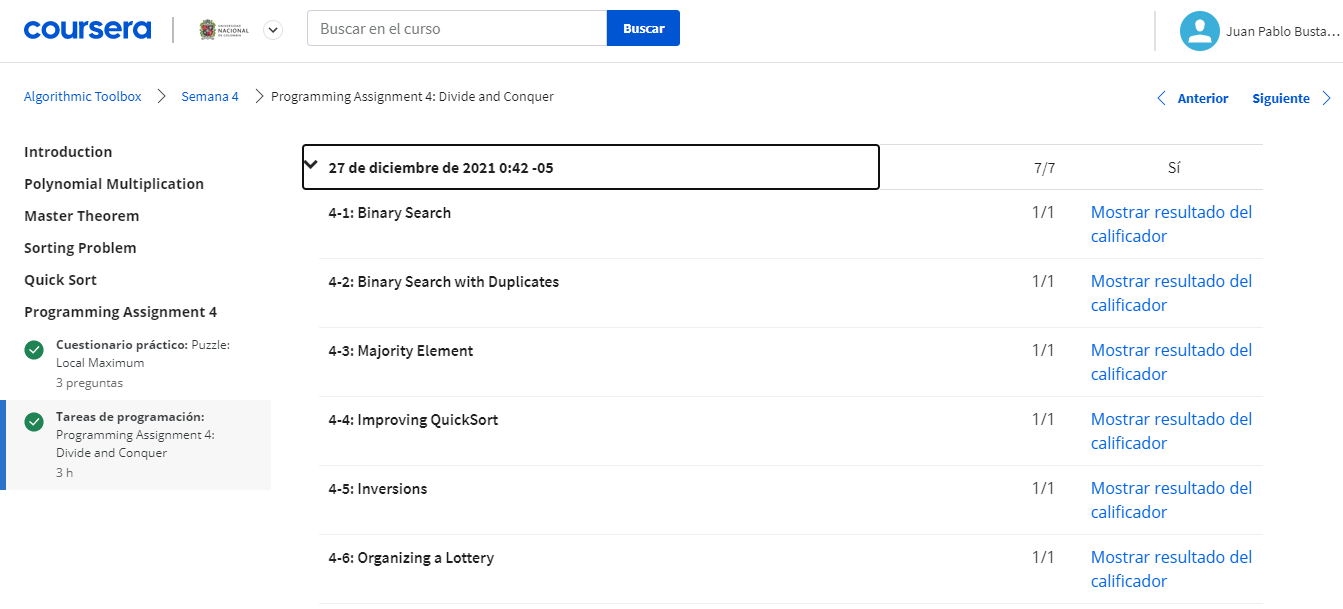



*   María Paula Calderón Jaimes

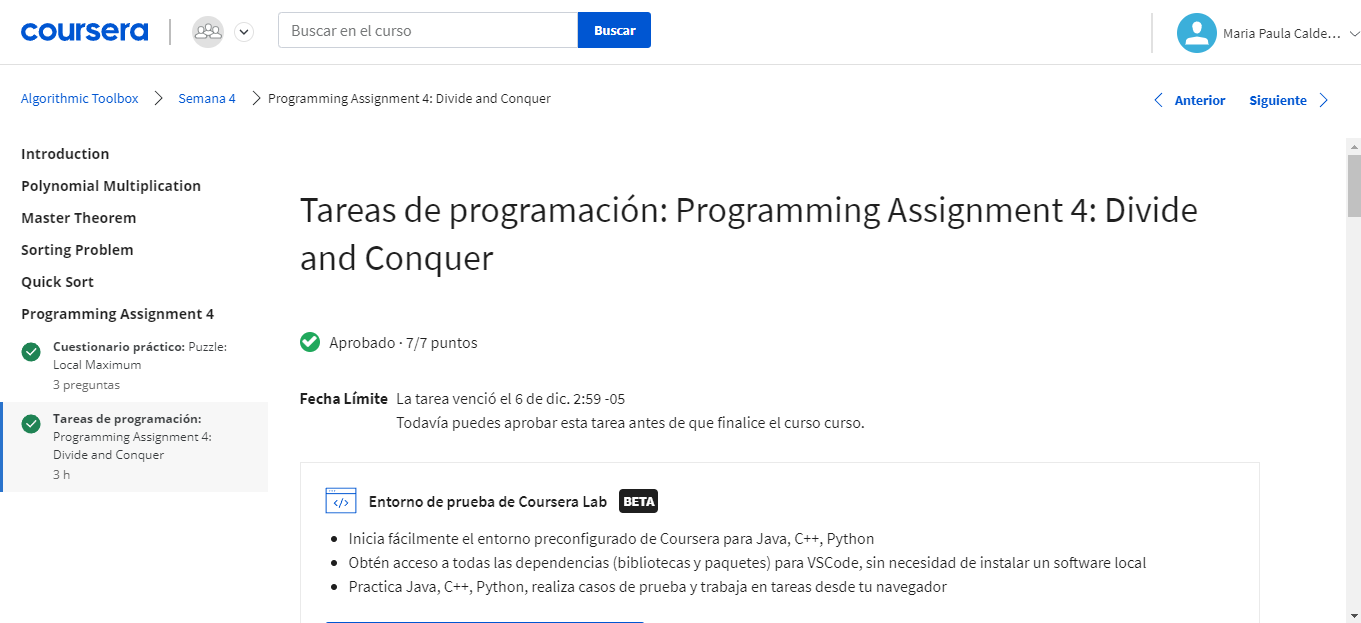

